In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from datetime import datetime
import warnings

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
font = {'size' : 12}
figure = {'titlesize' : 18}
plt.rc('font', **font)
plt.rc('figure', **figure)

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

from tqdm import tqdm
import missingno as msno

---

# Import

In [2]:
path = 'datasets/'
df = pd.read_csv(path + 'US_youtube_trending_data.csv')

---

# Overview

In [3]:
df.shape

(56391, 16)

In [4]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


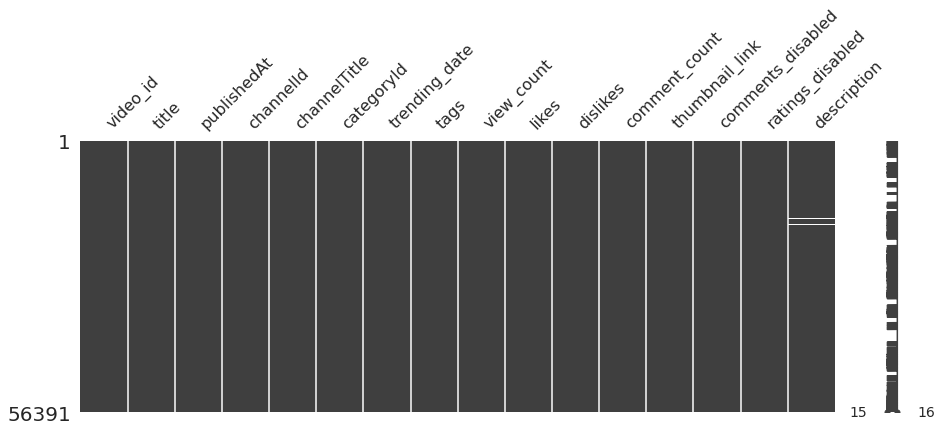

In [5]:
# data heatmap

msno.matrix(df, figsize=(15, 5));

In [6]:
df.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          491
dtype: int64

In [7]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

---

# Extracting dates

In [8]:
cols = ['publishedAt', 'trending_date']
df[cols].sample(5)

,publishedAt,trending_date
36633,2021-02-14T17:05:47Z,2021-02-15T00:00:00Z
25947,2020-12-16T02:30:09Z,2020-12-22T00:00:00Z
33459,2021-01-27T09:00:00Z,2021-01-30T00:00:00Z
23235,2020-12-08T20:00:15Z,2020-12-09T00:00:00Z
40018,2021-03-01T17:00:16Z,2021-03-04T00:00:00Z


In [9]:
# extract year, month, day, and hour from time features

date_formats = {'y':[0, 4], 'm':[5, 7], 'd':[8, 10], 'h':[11, 13]}
for col in cols:
    for key, [start, end] in date_formats.items():
        df['{}_{}'.format(col, key)] = df[col].str[start:end].astype(int)

In [10]:
# convert original time features to datetime

for col in cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%SZ')

In [11]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,trending_date_h
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,11,19,2020,8,12,0
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020,8,11,17,2020,8,12,0
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2020,8,11,16,2020,8,12,0
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8,11,16,2020,8,12,0
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,2020,8,11,15,2020,8,12,0


In [12]:
# drop trending_date_h since all 0

df = df.drop(columns='trending_date_h')

---

# Distributions

## Numerical data

In [13]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d
count,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00,56391.00
mean,18.62,2774104.35,152217.89,3419.31,15757.57,2020.49,6.55,15.84,13.90,2020.51,6.45,15.64
std,7.05,6495728.16,431041.45,15311.90,112172.57,0.50,3.86,8.70,6.90,0.50,3.85,8.62
min,1.00,0.00,0.00,0.00,0.00,2020.00,1.00,1.00,0.00,2020.00,1.00,1.00
25%,10.00,552122.50,21002.50,394.00,1912.00,2020.00,3.00,8.00,9.00,2020.00,3.00,8.00
50%,20.00,1140492.00,53286.00,925.00,4370.00,2020.00,8.00,16.00,16.00,2021.00,5.00,16.00
75%,24.00,2554232.00,133557.00,2517.00,10467.50,2021.00,10.00,23.00,19.00,2021.00,10.00,23.00
max,29.00,264407389.00,16021534.00,879354.00,6738537.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00


In [14]:
# quantiles every 10%

df.quantile(np.arange(0.1, 1.1, 0.1))

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d
0.10,10.00,311813.00,8244.00,195.00,830.00,0.00,0.00,2020.00,1.00,4.00,2.00,2020.00,1.00,4.00
0.20,10.00,469729.00,16479.00,323.00,1537.00,0.00,0.00,2020.00,2.00,7.00,5.00,2020.00,2.00,7.00
0.30,17.00,645762.00,26283.00,471.00,2294.00,0.00,0.00,2020.00,3.00,10.00,13.00,2020.00,3.00,10.00
0.40,20.00,857932.00,38525.00,667.00,3198.00,0.00,0.00,2020.00,4.00,13.00,15.00,2020.00,4.00,13.00
0.50,20.00,1140492.00,53286.00,925.00,4370.00,0.00,0.00,2020.00,8.00,16.00,16.00,2021.00,5.00,16.00
0.60,23.00,1535573.00,74204.00,1316.00,6036.00,0.00,0.00,2021.00,9.00,19.00,17.00,2021.00,9.00,19.00
0.70,24.00,2113894.00,108267.00,1969.00,8581.00,0.00,0.00,2021.00,10.00,22.00,18.00,2021.00,10.00,21.00
0.80,24.00,3186372.00,168613.00,3271.00,13112.00,0.00,0.00,2021.00,11.00,25.00,20.00,2021.00,11.00,24.00
0.90,26.00,5822535.00,321027.00,6672.00,25258.00,0.00,0.00,2021.00,12.00,28.00,22.00,2021.00,12.00,27.00
1.00,29.00,264407389.00,16021534.00,879354.00,6738537.00,1.00,1.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00


In [15]:
# quantiles of top 10%

df.quantile(np.arange(0.9, 1.01, 0.01))

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d
0.90,26.00,5822535.00,321027.00,6672.00,25258.00,0.00,0.00,2021.00,12.00,28.00,22.00,2021.00,12.00,27.00
0.91,26.00,6353396.20,347852.50,7394.80,27722.90,0.00,0.00,2021.00,12.00,28.00,22.00,2021.00,12.00,28.00
0.92,26.00,6984484.80,382264.40,8240.60,30943.20,0.00,0.00,2021.00,12.00,29.00,22.00,2021.00,12.00,28.00
0.93,26.00,7697479.10,427142.90,9356.80,34523.10,0.00,0.00,2021.00,12.00,29.00,22.00,2021.00,12.00,29.00
0.94,27.00,8609796.40,479742.60,10699.20,38988.00,0.00,0.00,2021.00,12.00,29.00,22.00,2021.00,12.00,29.00
0.95,27.00,9847258.00,546446.00,12483.00,46020.00,0.00,0.00,2021.00,12.00,30.00,22.00,2021.00,12.00,29.00
0.96,28.00,11458382.60,640347.20,14917.40,55463.80,0.00,0.00,2021.00,12.00,30.00,23.00,2021.00,12.00,30.00
0.97,28.00,14317343.60,844732.50,18942.00,72540.90,0.00,0.00,2021.00,12.00,30.00,23.00,2021.00,12.00,30.00
0.98,28.00,19266379.20,1168774.40,25406.40,100138.00,1.00,0.00,2021.00,12.00,30.00,23.00,2021.00,12.00,30.00
0.99,28.00,28009095.20,1675484.10,39631.80,157635.80,1.00,0.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00


===
categoryId



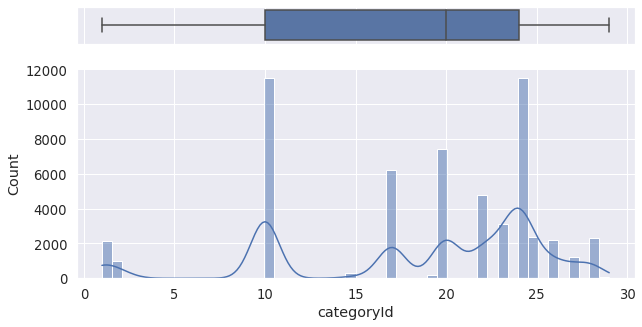


===
view_count



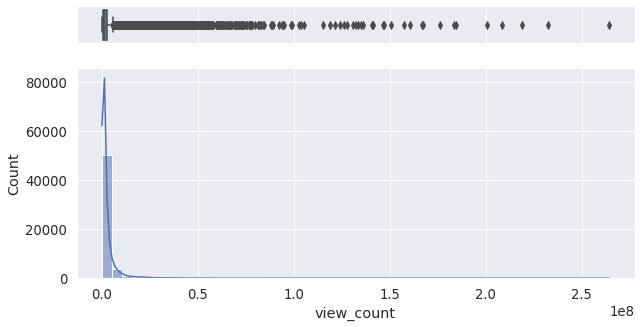


===
likes



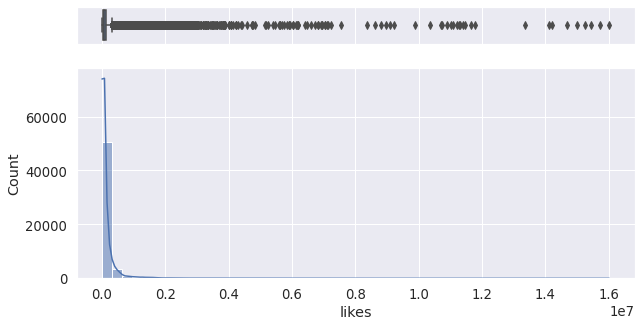


===
dislikes



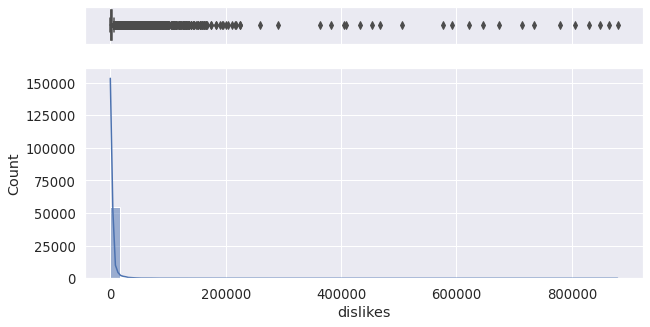


===
comment_count



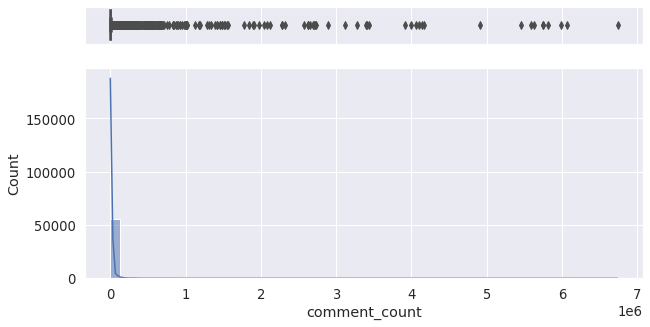


===
publishedAt_y



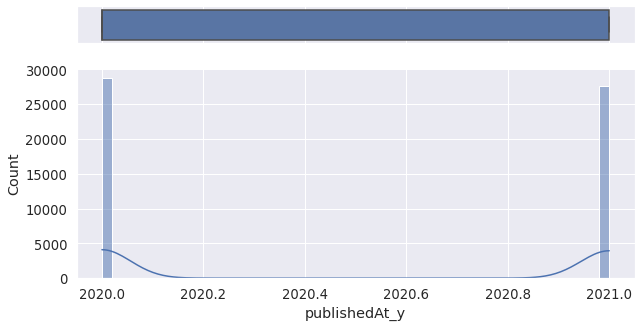


===
publishedAt_m



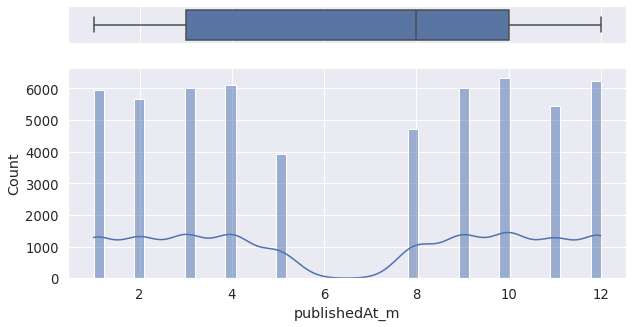


===
publishedAt_d



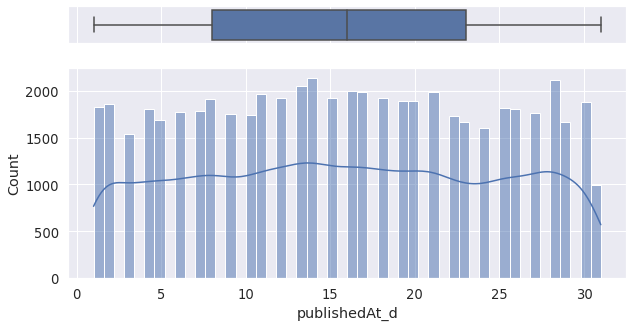


===
publishedAt_h



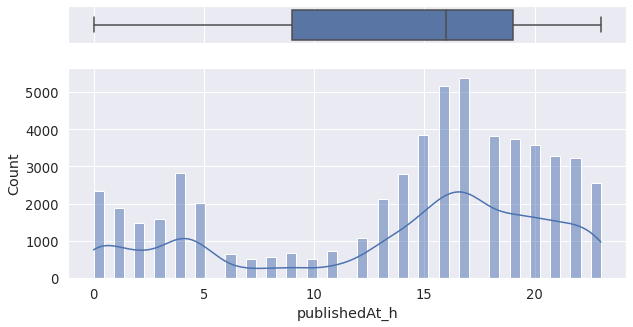


===
trending_date_y



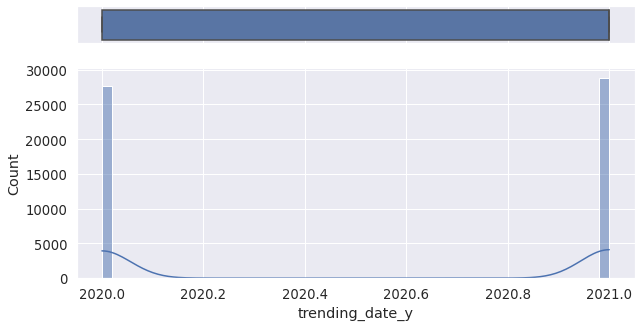


===
trending_date_m



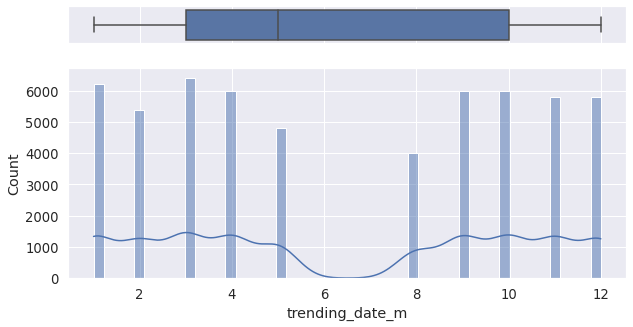


===
trending_date_d



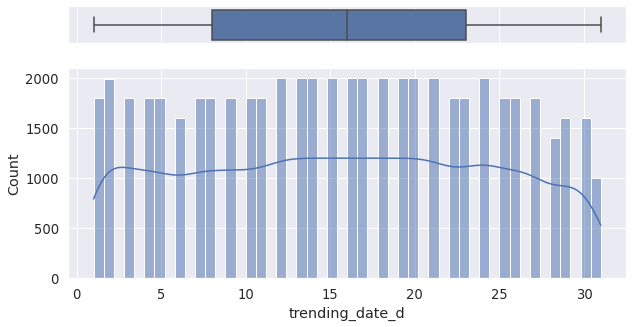

In [16]:
# plot boxplot and histogram distributions

for col in df.select_dtypes(include=np.number).columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    sns.boxplot(data=df, x=col, ax=ax[0])
    ax[0].set(xlabel='')
    sns.histplot(data=df, x=col, ax=ax[1], bins=50, kde=True)
    plt.show();
    print('')

In [17]:
# removing top 1% of view_count, likes, dislikes, and comment_count

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

q_by_01 = df.quantile(np.arange(0.9, 1.01, 0.01))
df_99 = df.copy()
q_99 = q_by_01.iloc[[9]]

for col in cols:
    df_99.loc[df_99[col] > q_99[col].values[0], col] = np.nan

===
view_count



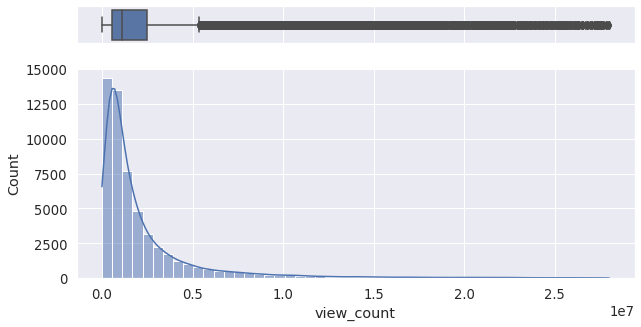


===
likes



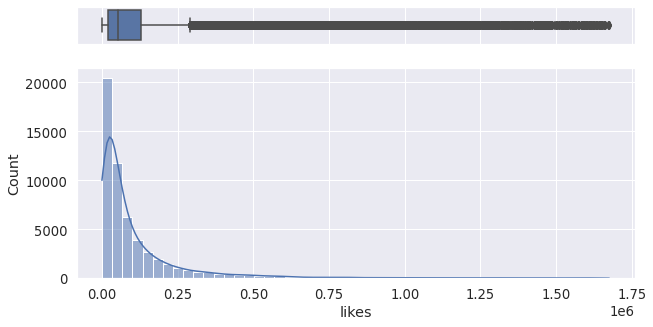


===
dislikes



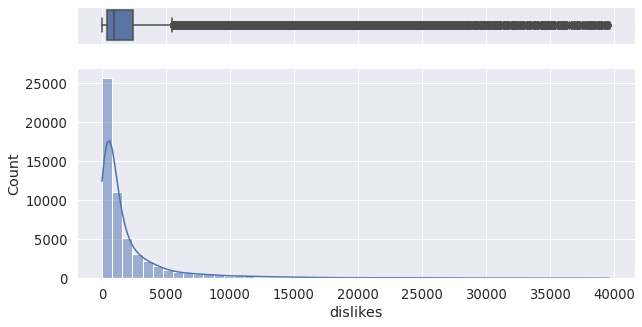


===
comment_count



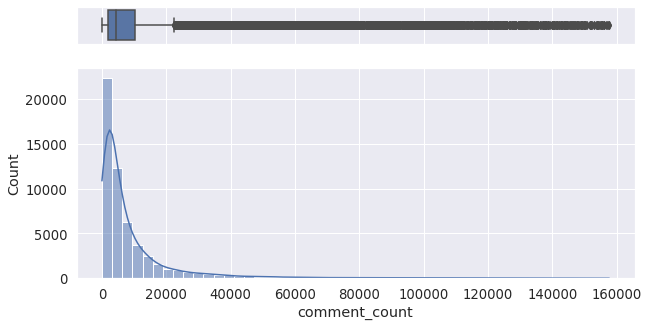

In [18]:
# plot boxplot and histogram distributions

for col in df_99[cols].columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    sns.boxplot(data=df_99, x=col, ax=ax[0])
    ax[0].set(xlabel='')
    sns.histplot(data=df_99, x=col, ax=ax[1], bins=50, kde=True)
    plt.show();
    print('')

## Categorical data

===
video_id

      video_id  count
0  wY6UyatwVTA     34
1  pvPsJFRGleA     27
2  UF7hTMMeRv0     17
3  ly6yEJSDFko     17
4  GdJkO3PLZrs     14
5  moOxq_8l_34     13
6  I9RC_DANDAM     12
7  1SIX0HTH-50     12
8  KLjUPvrSG_Q     12
9  Bbyftsl7Owo     12


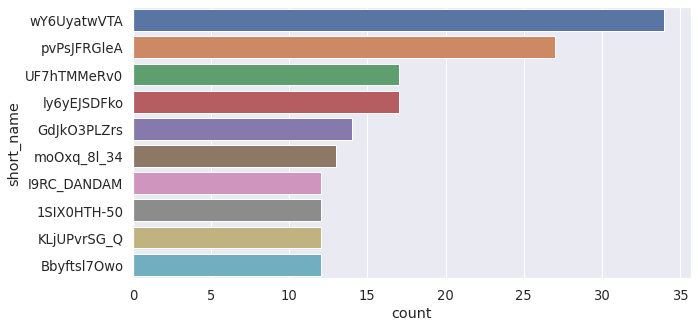


===
title

                                               title  count
0                                   Starlink Mission     77
1  India claim stunning series win, end Australia...     34
2         Justin Bieber - Holy ft. Chance The Rapper     27
3                   Creative People On Another Level     22
4                                        We Broke Up     21
5       $1000 if You Can Break This Ball in 1 Minute     19
6                                        we broke up     19
7  Mike Tyson and Roy Jones Jr hilarious joint in...     17
8           Prince Philip's funeral: the key moments     17
9  Most Oddly Satisfying Video to watch before sleep     15


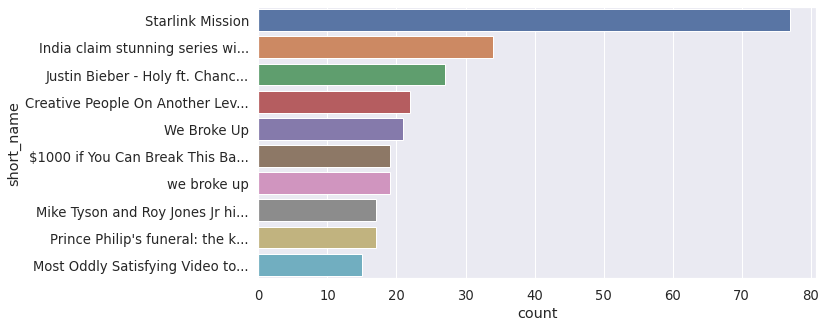


===
channelId

                  channelId  count
0  UCDVYQ4Zhbm3S2dlz7P1GBDg    410
1  UCWJ2lWNubArHWmf3FIHbfcQ    379
2  UCIPPMRA040LQr5QPyJEbmXA    278
3  UCqFzWxSCi39LnW1JKFR3efg    247
4  UCX6OQ3DkcsbYNE6H8uQQuVA    231
5  UCiWLfSweyRNmLpgEHekhoAg    216
6  UCpB959t8iPrxQWj7G6n0ctQ    213
7  UCET00YnetHT7tOpu12v8jxg    211
8  UCRijo3ddMTht_IHyNSNXpNQ    196
9  UCtI0Hodo5o5dUb67FeUjDeA    189


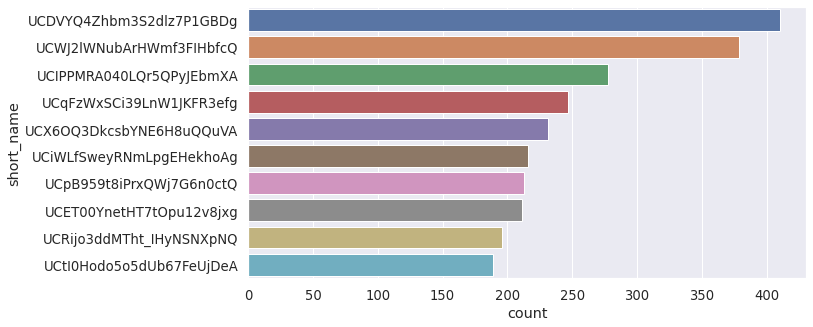


===
channelTitle

                     channelTitle  count
0                             NFL    410
1                             NBA    379
2                  MrBeast Gaming    278
3             Saturday Night Live    247
4                         MrBeast    231
5                            ESPN    216
6                    SSSniperWolf    213
7  Champions League on CBS Sports    211
8                    Dude Perfect    196
9                          SpaceX    189


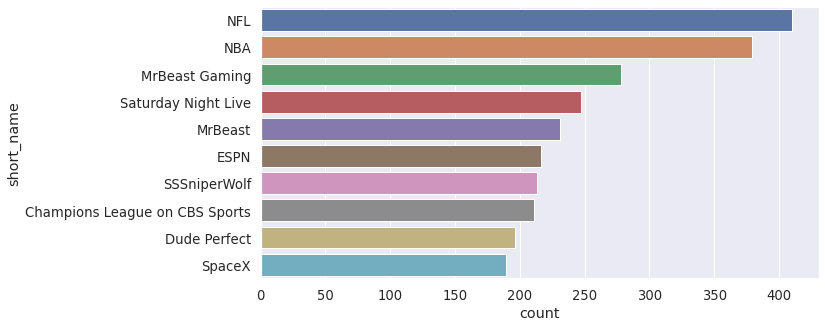


===
tags

                                                tags  count
0                                             [None]   7347
1                    BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄    102
2  danny gonzalez|funny|commentary|comedy|react|r...     94
3  Amber|amber vtuber|genshi|genshi game|genshi i...     88
4       SpaceX|Space|Musk|Satellite|NROl-108|Mission     79
5  Matt Stonie|Megatoad|Competitive Eating|Food C...     77
6  NPR|NPR Music|National Public Radio|Live|Perfo...     76
7              sidemen|sidemen sunday|#sidemensunday     73
8  Clash Royale|Clash Royale Game|Supercell|Super...     71
9                                          jake paul     65


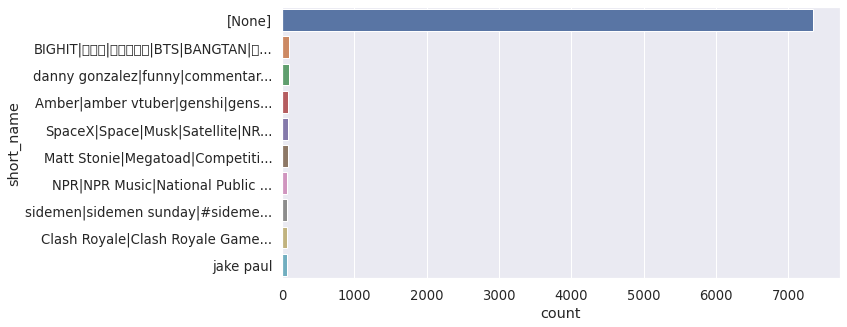


===
thumbnail_link

                                   thumbnail_link  count
0  https://i.ytimg.com/vi/wY6UyatwVTA/default.jpg     34
1  https://i.ytimg.com/vi/pvPsJFRGleA/default.jpg     27
2  https://i.ytimg.com/vi/ly6yEJSDFko/default.jpg     17
3  https://i.ytimg.com/vi/UF7hTMMeRv0/default.jpg     17
4  https://i.ytimg.com/vi/GdJkO3PLZrs/default.jpg     14
5  https://i.ytimg.com/vi/moOxq_8l_34/default.jpg     13
6  https://i.ytimg.com/vi/uioLnStATUc/default.jpg     12
7  https://i.ytimg.com/vi/Bbyftsl7Owo/default.jpg     12
8  https://i.ytimg.com/vi/Q4LKWQyeBw8/default.jpg     12
9  https://i.ytimg.com/vi/I9RC_DANDAM/default.jpg     12


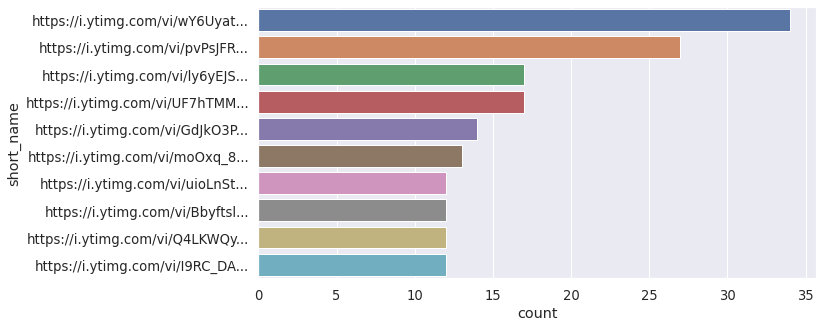


===
description

                                         description  count
0  Connect with BTS: https://ibighit.com/bts http...     52
1  Follow me on:Twitter: https://twitter.com/lena...     40
2  VISIT: http://www.themaclife.comFOLLOW: http:/...     36
3  Rishabh Pant was the hero as an injury-ravaged...     34
4  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...     29
5  MERCH: https://teespring.com/stores/dices-3Tik...     27
6  Holy out now: https://JustinBieber.lnk.to/Holy...     27
7  Thanks for Tuning In!! Lets Get 5 Million Toge...     25
8  LAST VIDEO: \r\r*MAKE SURE OUR POST NOTIFICATI...     24
9  #SidemenGaming• Sidemen: http://www.youtube.co...     24


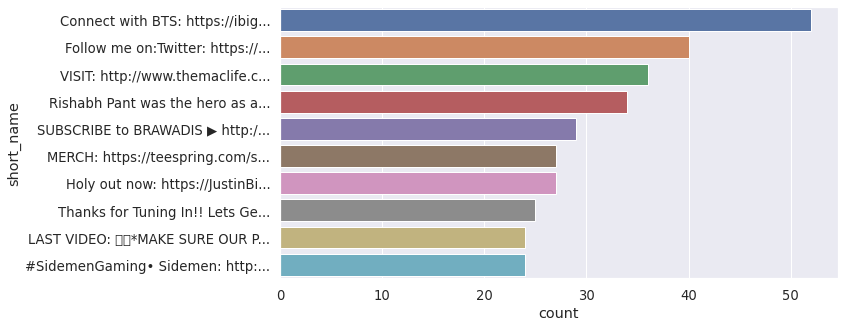

In [19]:
# plotting top 10 count of categorical features

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for col in df.select_dtypes(include='object').columns:

        print('===')
        print('\033[1m' + col + '\033[0m')
        print('')

        df_count = pd.DataFrame(data=df[col].value_counts().head(10)).reset_index(drop=False).rename(columns={col:'count', 'index':col})
        print(df_count)

        df_count.loc[df_count[col].str.len() > 30, 'short_name'] = df_count[col].str[:30] + '...'
        df_count.loc[df_count[col].str.len() <= 30, 'short_name'] = df_count[col]

        plt.figure(figsize = (10,5))
        sns.barplot(data=df_count, x='count', y='short_name')
        plt.show();

        print('')

## Binary data

In [20]:
for col in df.select_dtypes(include='bool').columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    print(pd.DataFrame(data=df[col].value_counts().head(10)).reset_index(drop=False).rename(columns={col:'count', 'index':col}))
    print('')

===
comments_disabled

   comments_disabled  count
0              False  55205
1               True   1186

===
ratings_disabled

   ratings_disabled  count
0             False  56041
1              True    350



---

# Correlation

## All features

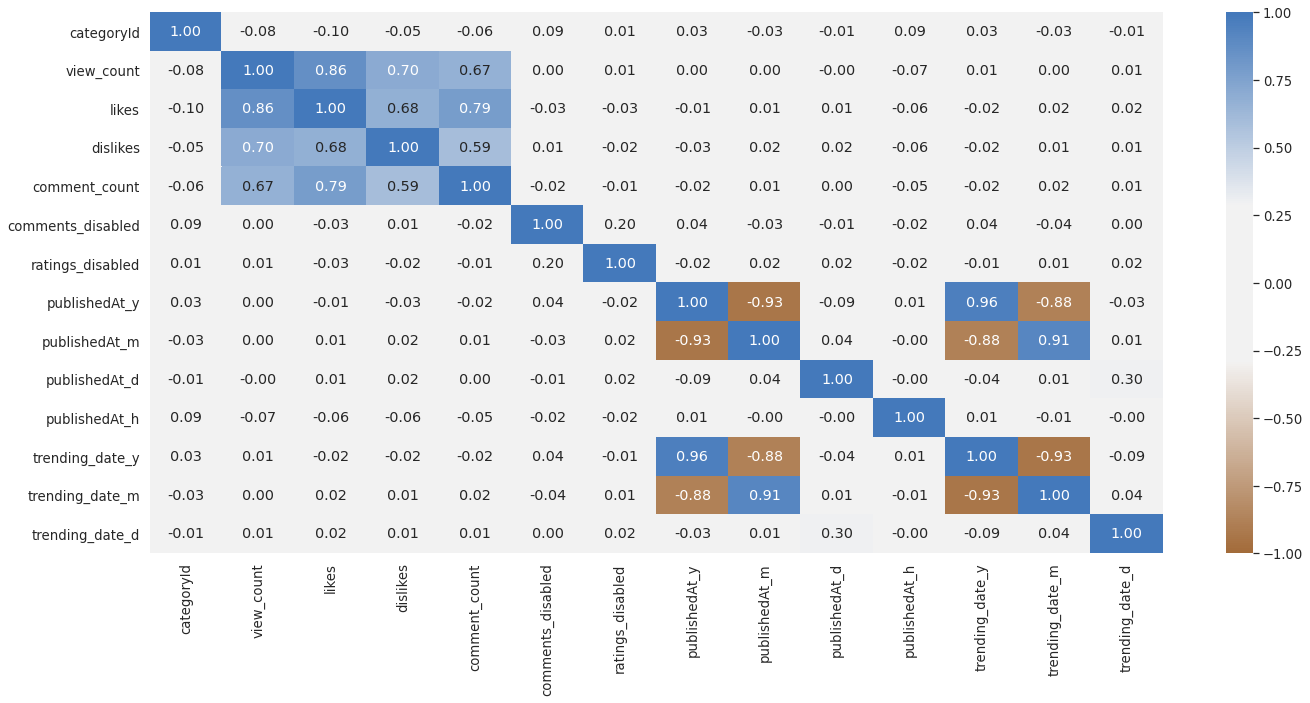

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(40, 250, sep=75, as_cmap=True), vmax=1, vmin=-1);
plt.tight_layout()

## Features vs. view_count

===
likes



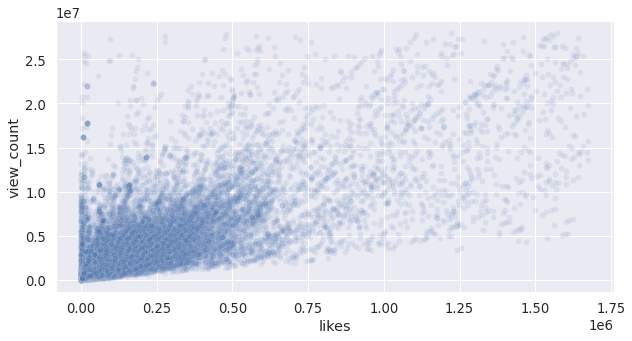


===
dislikes



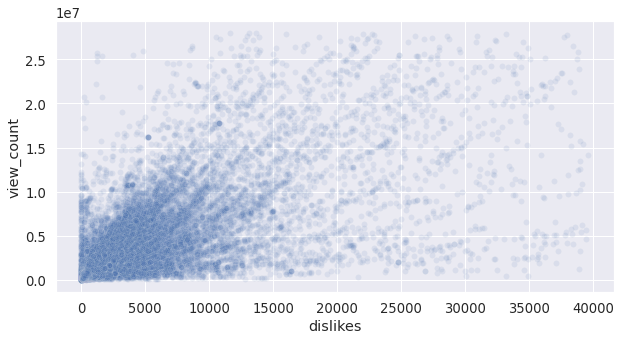


===
comment_count



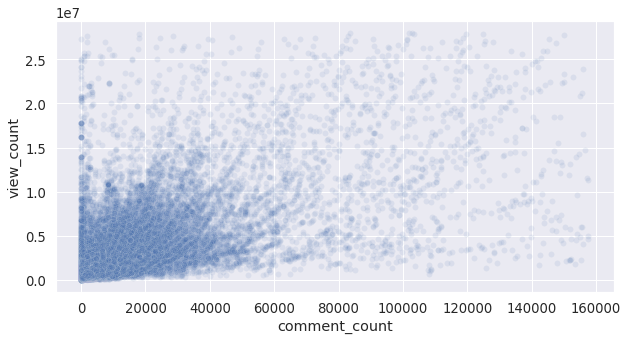


===
comments_disabled



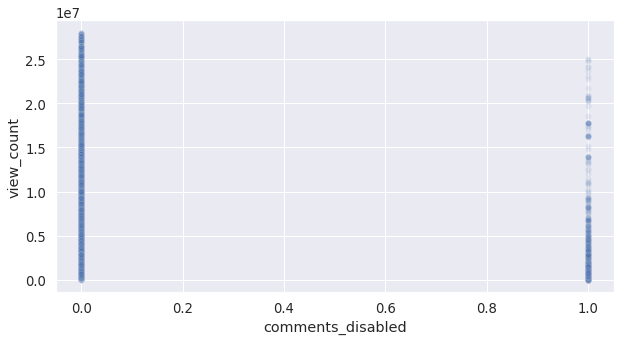


===
ratings_disabled



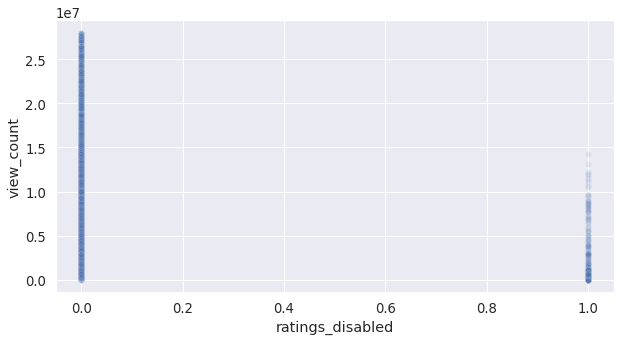


===
publishedAt_y



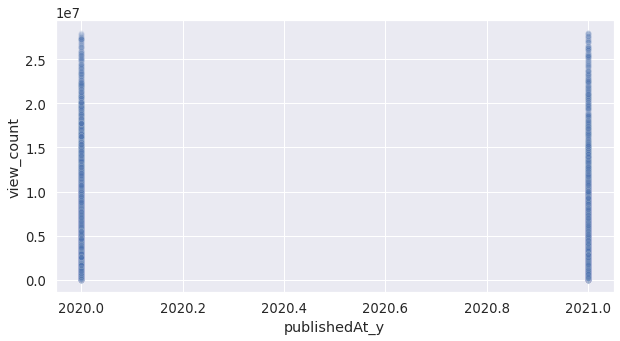


===
publishedAt_m



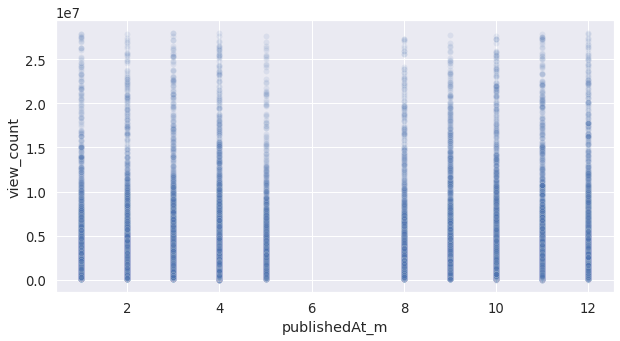


===
publishedAt_d



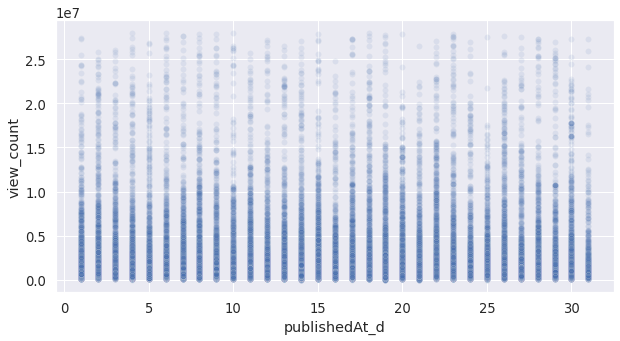


===
publishedAt_h



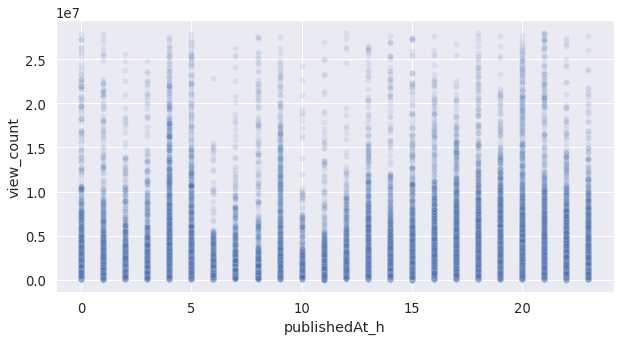

In [22]:
cols = 'likes dislikes comment_count comments_disabled ratings_disabled publishedAt_y publishedAt_m publishedAt_d publishedAt_h'.split()

for col in cols:

    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')

    plt.figure(figsize = (10,5))
    sns.scatterplot(data=df_99, x=col, y='view_count', alpha=0.1)
    plt.show();
    print('')

---